In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.shape

(1000, 8)

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
df = df.rename(columns={
    "gender": "cinsiyet",
    "race/ethnicity": "irk_etnik_grup",
    "parental level of education": "ebeveyn_egitim_duzeyi",
    "lunch": "ogle_yemegi",
    "test preparation course": "hazirlik_kursu",
    "math score": "matematik_notu",
    "reading score": "okuma_notu",
    "writing score": "yazma_notu"
})

In [8]:
df.head()

,cinsiyet,irk_etnik_grup,ebeveyn_egitim_duzeyi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Öğrencilerin matematik notu dağılımı nasıldır?

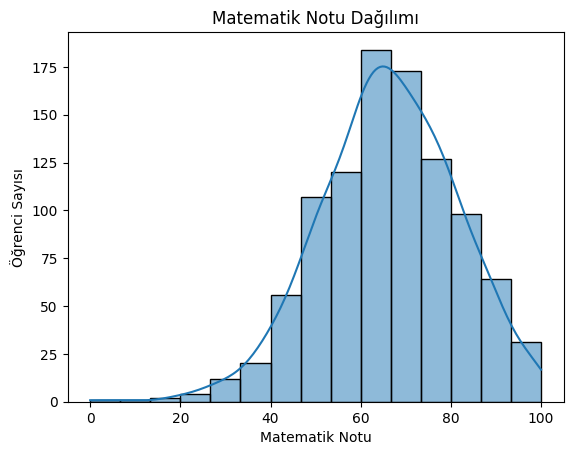

In [11]:
sns.histplot(data=df , x='matematik_notu' , bins=15 , kde=True)
plt.title('Matematik Notu Dağılımı')
plt.xlabel('Matematik Notu')
plt.ylabel('Öğrenci Sayısı')
plt.show()

## Cinsiyete göre matematik notu dağılımını göster.

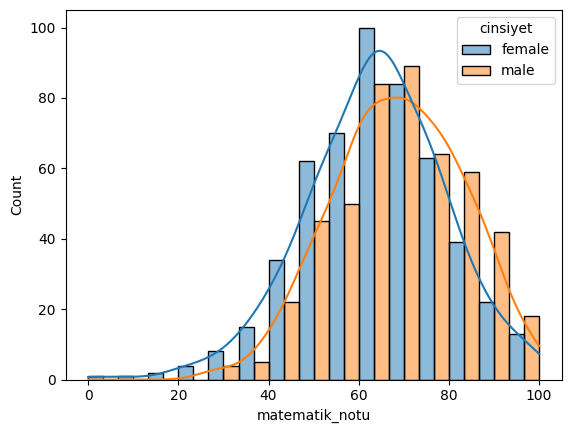

In [14]:
sns.histplot(data=df , x='matematik_notu' , hue='cinsiyet' , bins=15
                ,kde=True , multiple='dodge')
plt.show()

In [15]:
df.head()

,cinsiyet,irk_etnik_grup,ebeveyn_egitim_duzeyi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


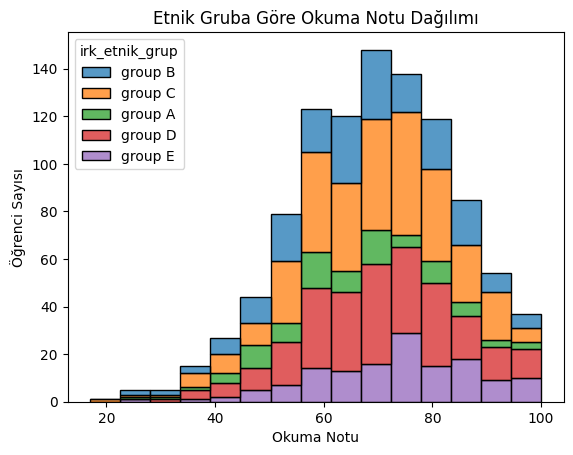

In [21]:
sns.histplot(data=df , x='okuma_notu' , hue='irk_etnik_grup'
             ,bins=15 , multiple='stack')
plt.title('Etnik Gruba Göre Okuma Notu Dağılımı')
plt.xlabel('Okuma Notu')
plt.ylabel('Öğrenci Sayısı')
plt.show()

## Ebeveyn eğitim düzeyine göre okuma notu dağılımı nasıl?

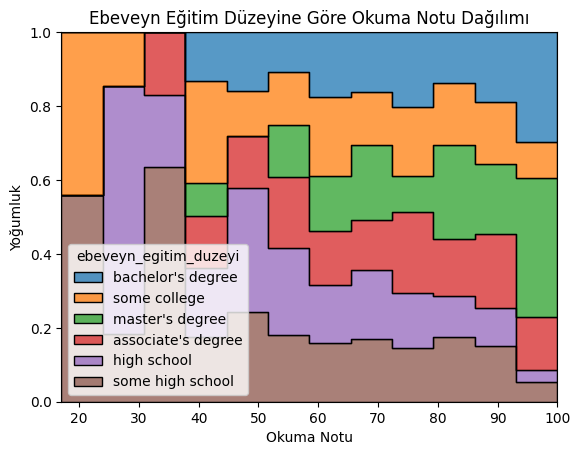

In [34]:
sns.histplot(data=df , x='okuma_notu' , hue='ebeveyn_egitim_duzeyi',
                                        bins=12 , multiple='fill' 
                                         , stat='density' , element='step'
                                         ,common_norm=False)
plt.title('Ebeveyn Eğitim Düzeyine Göre Okuma Notu Dağılımı')
plt.xlabel('Okuma Notu')
plt.ylabel('Yoğumluk')
plt.show()

## Matematik, okuma ve yazma notu 90 ve üstü olan öğrenci sayısı dağılımını göster.

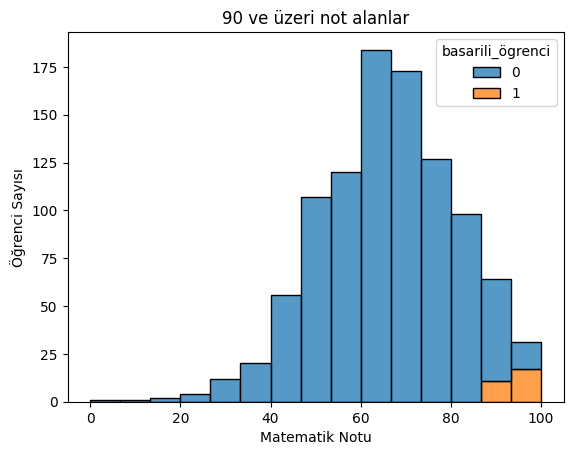

In [38]:
df['basarili_ögrenci'] = (
        (df['matematik_notu'] >= 90) &
        (df['okuma_notu'] >=90) &
        (df['yazma_notu'] >=90)
).astype(int)
sns.histplot(data=df , x='matematik_notu',hue='basarili_ögrenci'
                                ,bins=15 , multiple='stack')
plt.title('90 ve üzeri not alanlar')
plt.xlabel('Matematik Notu')
plt.ylabel('Öğrenci Sayısı')
plt.show()

## Ebeveyn eğitim düzeyine göre okuma notu dağılımı

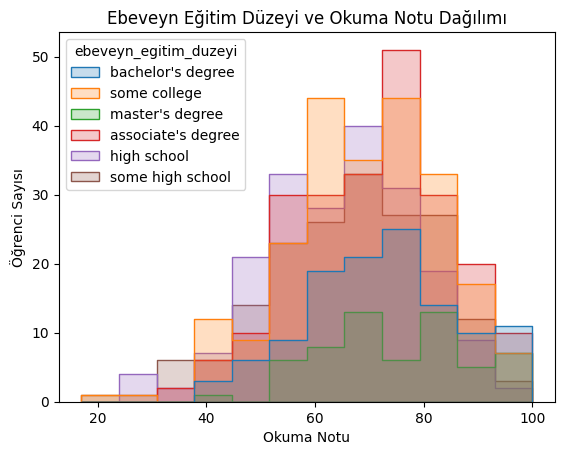

In [41]:
sns.histplot(data=df , x='okuma_notu' , hue='ebeveyn_egitim_duzeyi',
                                element='step' , bins=12, palette='tab10',multiple='layer')
plt.title("Ebeveyn Eğitim Düzeyi ve Okuma Notu Dağılımı")
plt.xlabel("Okuma Notu")
plt.ylabel("Öğrenci Sayısı")
plt.show()